In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('creditcard.csv')

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


<ipython-input-8-14a0430b79be>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['Class']).plot.bar()


<Axes: xlabel='Class'>

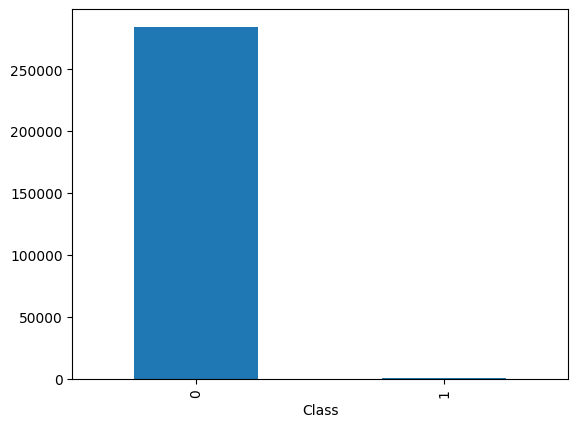

In [8]:
pd.value_counts(df['Class']).plot.bar()

In [9]:
len(df.columns)

31

In [10]:
x=df.iloc[:,1:30]
y=df.iloc[:,-1]

In [11]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [23]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [13]:
from  sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [15]:
y_train.value_counts()

,count
Class,
0,199008
1,356


In [27]:
import tensorflow
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Sequential

In [17]:
print(len(x.columns))
n_inputs=29

29


In [19]:
model=Sequential()
model.add(Dense(50,input_dim=n_inputs,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')
model.fit(x_train,y_train,epochs=10)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6231/6231 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0351
Epoch 2/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0083
Epoch 3/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0088
Epoch 4/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.0127
Epoch 5/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.0071
Epoch 6/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.0065
Epoch 7/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.0086
Epoch 8/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0058
Epoch 9/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0052
Epoch 10/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0057


In [20]:
from sklearn.metrics import roc_auc_score
y_pred1=model.predict(x_test)
print(roc_auc_score(y_test,y_pred1))

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
0.9592522750012239


In [24]:
weights_assigned={0:1,1:550}

In [26]:
print(y_train.unique())

[0 1]


In [34]:
import numpy as np

In [35]:
print(np.unique(y_train))


[0 1]


In [38]:
unique_labels = np.unique(y_train)
print("Unique labels in y_train:", unique_labels)


Unique labels in y_train: [0 1]


In [37]:
print(type(x_train))
print(type(y_train))
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("First few rows of x_train:\n", x_train.head())  # If it's a DataFrame

print("Class weights:", weights_assigned)


<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
x_train shape: (199364, 29)
y_train shape: (199364,)
First few rows of x_train:
               V1        V2        V3        V4        V5        V6        V7  \
2557   -2.289565 -0.480260  0.818685 -1.706423  0.822102 -1.660326  0.944047   
247823 -0.313717 -4.064342 -3.398445  0.704011  0.101662  1.529848  1.551670   
152342 -1.809763 -0.567439  2.265186 -0.960318 -1.212537  1.516493 -1.417176   
103385  1.192319  0.178575  0.141491  0.459628 -0.049959 -0.112122 -0.163883   
8771   -0.963451  0.700311  1.097333 -1.547626  0.669966  0.513533  0.333683   

              V8        V9       V10  ...       V20       V21       V22  \
2557   -0.541765  1.323156 -0.434426  ... -0.831985 -0.210837  0.914737   
247823 -0.036774  0.015829 -0.359561  ...  2.142593  0.853186 -0.091941   
152342  0.903421  1.961027 -0.724328  ... -0.554004 -0.509915 -0.424978   
103385  0.155740 -0.067566 -0.130220  ... -0.149985 -0.240464 -0.739862   
8

In [40]:
class_weights = {0: 1, 1: 550}
for label in unique_labels:
    if label not in class_weights:
        print(f"Warning: Class {label} not found in class_weights dictionary.")
        # Optionally, add the label to the class_weights with a default value
        class_weights[label] = 1

print("Class weights:", class_weights)

Class weights: {0: 1, 1: 550}


In [41]:
model = Sequential()
model.add(Input(shape=(x_train.shape[1],)))  # Input layer
model.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

# Fit the model
model.fit(x_train, y_train, class_weight=class_weights, epochs=10)

Epoch 1/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 6.4047
Epoch 2/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 2.0602
Epoch 3/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 1.6988
Epoch 4/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 1.8842
Epoch 5/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 2.0702
Epoch 6/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 3.7321
Epoch 7/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 2.3249
Epoch 8/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 2.5823
Epoch 9/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 3.5529
Epoch 10/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 2.9022


In [42]:
y_pred=model.predict(x_test)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [43]:
roc_auc_score(y_test,y_pred)

0.9621959252361194